In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 


In [27]:
DT = 0.005
DX = 0.01
N = 101

In [28]:
def func(x: float) -> float:
    return np.exp(-100 * (x-0.5)**2)

In [29]:
class String:
    def __init__(self, tmax: int):
        self.positions = np.zeros((int(tmax//DT), N))
        self.velocities = np.zeros((int(tmax//DT), N))
        self.t = np.linspace(0, tmax, int(tmax//DT))

    def get_next_a(self, t: int, i: int):
        right = self.positions[t, i+1]
        left = self.positions[t, i-1]
        middle = self.positions[t, i]
        return (right + left - 2 * middle) / (DX**2)

    def get_next_v(self, t: int, i: int):
        # print(type(t), type(i))
        return self.velocities[t, i] + DT / 2 * (self.get_next_a(t+1, i)+self.get_next_a(t, i))

    def get_next_position(self, t: int, i: int):
        return self.positions[t, i] + DT * self.velocities[t, i]+DT**2/2*(self.get_next_a(t, i))

    def setup(self):
        self.positions[0, 0] = 0
        self.positions[0, N-1] = 0
        for point in range(1, N-1):
            self.positions[0, point] = func(point*DX)

    def calculate(self):
        self.setup()
        for t in range(len(self.t)-1):
            for point in range(1, N-1):
                self.velocities[t, point] = self.get_next_v(t, point)
                self.positions[t, point] = self.get_next_position(t, point)

    def plot(self):
        plt.plot(self.positions[5, :])




    


In [30]:
s = String(100)
s.calculate()

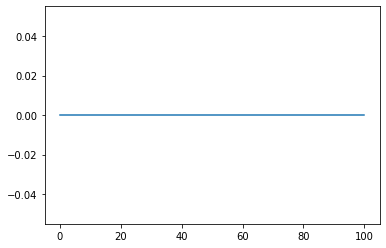

In [31]:
s.plot()

In [35]:
fig = plt.figure()
axis = plt.axes()
line, = axis.plot([], [], lw=3)
def init():
    line.set_data(range(N), s.positions[0, :])
    return line,

def animate(i):
    line.set_data(range(N), s.positions[i, :])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(s.t), interval=20, blit=True)
anim.save("wave.mp4", writer="ffmpeg", fps=300)

MovieWriter ffmpeg unavailable; using Pillow instead.
